name: **Vipul Jain**

group members:
*Vipul Jain
*Om Sai Krishna Madhav Lella
*Micheal Guel
*Jeeva Saravana Bhavanandam

Feel free to arrange the tables so that your group can work effectively together. Please return them to their original configuration before you leave.

Read this notebook completely before you get started. There are essentially two parts: Seaborn visualization and getting those visualizations into Streamlit. Be strategic:
* spend 35 minutes on each part,
* have half your group get started on each part and then bring them together.

____
## Seaborn ICA
____

The main goal for this ICA is to get data, perform some simple EDA and design the layout for a web app. This is the process you will be thinking about for your first project. Think of this as practice for your project, as well as practicing with Seaborn.

To make it so that you can discuss with your classmates, however, we will all use the same dataset for today.

Suppose you decide to do a project in the medical arena, and you learn of the Wisconsin Breast Cancer Diagnostic dataset.

👉🏻 (5) Your first task: find the WI cancer dataset and download it. There are many places on the internet where you can find it, and it might be in slightly different formats depending on where you get it.

👉🏻 (5) Read the dataset into a dataframe, using something like [.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Note that you may need to use more than one file to get the column names. This is the messy part of data science. You might spend some time finding a clean CSV that already has the column names (hint: kaggle), or you need to add the information yourself.

👉🏻 (8) One you have read the data in and built a dataframe with good column names, perform some basic IDA and EDA. Are there NaNs? What are in the columns and what looks useful? You might use some of the basic plotting capabilities in Pandas, or even try using `Seaborn`.

👉🏻 (15) Design 3-5 "interesting" `Seaborn` plots. Talk through this with your group. Here, "interesting" means that there is an interesting **story/narrative** to be told. Think through what good choices would be: are there interesting distributions? are there interesting categories, and distributions within categories? Feel free to make as many practice plots as you need, which you use in Streamlit. Design these plots into a web app. In a markdown cell, describe your design.

Use one Seaborn plot from each type ([distribution](https://seaborn.pydata.org/tutorial/distributions.html), [categorical](https://seaborn.pydata.org/tutorial/categorical.html) and [relational](https://seaborn.pydata.org/tutorial/relational.html)). If it makes sense, use the regression options.


____
### Build the WebApp
____

👉🏻 Build a web app using `streamlit`. This web app will be different from your previous web apps in three ways:
1. you use the WI Cancer dataset, which needs to be read in from a file (not coming in through a library),
2. your plots are all Seaborn (not Altair or Plotly or Matplotlib),
3. you will ask your user to [input something](https://docs.streamlit.io/library/api-reference/widgets) that impacts at least one of the plots.


A simple idea for step 3 is to ask the user to input what column to plot, using [this widget](https://docs.streamlit.io/library/api-reference/widgets/st.selectbox). Or, you can use two widgets to ask for what to put on $y$ and $x$. It's up to you: when you do your project, you will have to make these decisions on your own, as each student will have a unique design.

Before you leave, demonstrate your web app, using `streamlit run your_file.py` to one of the instructors. Include  `your_file.py` file in D2L, as well as this notebook.


In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt



In [26]:
df_cancer = pd.read_csv("./data.csv")

In [4]:
df_cancer.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
df_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [9]:
df_cancer.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
df_cancer.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [19]:
print(df_cancer.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [20]:
df_cancer.shape

(569, 33)

In [24]:
df_cancer['id'].unique().shape

(569,)

In [27]:
df_cancer.drop(columns=['id','Unnamed: 32'], inplace = True)
df_cancer.shape

(569, 31)

C:\Users\vipul\AppData\Local\Temp\ipykernel_19264\2598637977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cancer.corr(),cmap='YlGnBu',annot = False,linewidths=.5)


<Axes: >

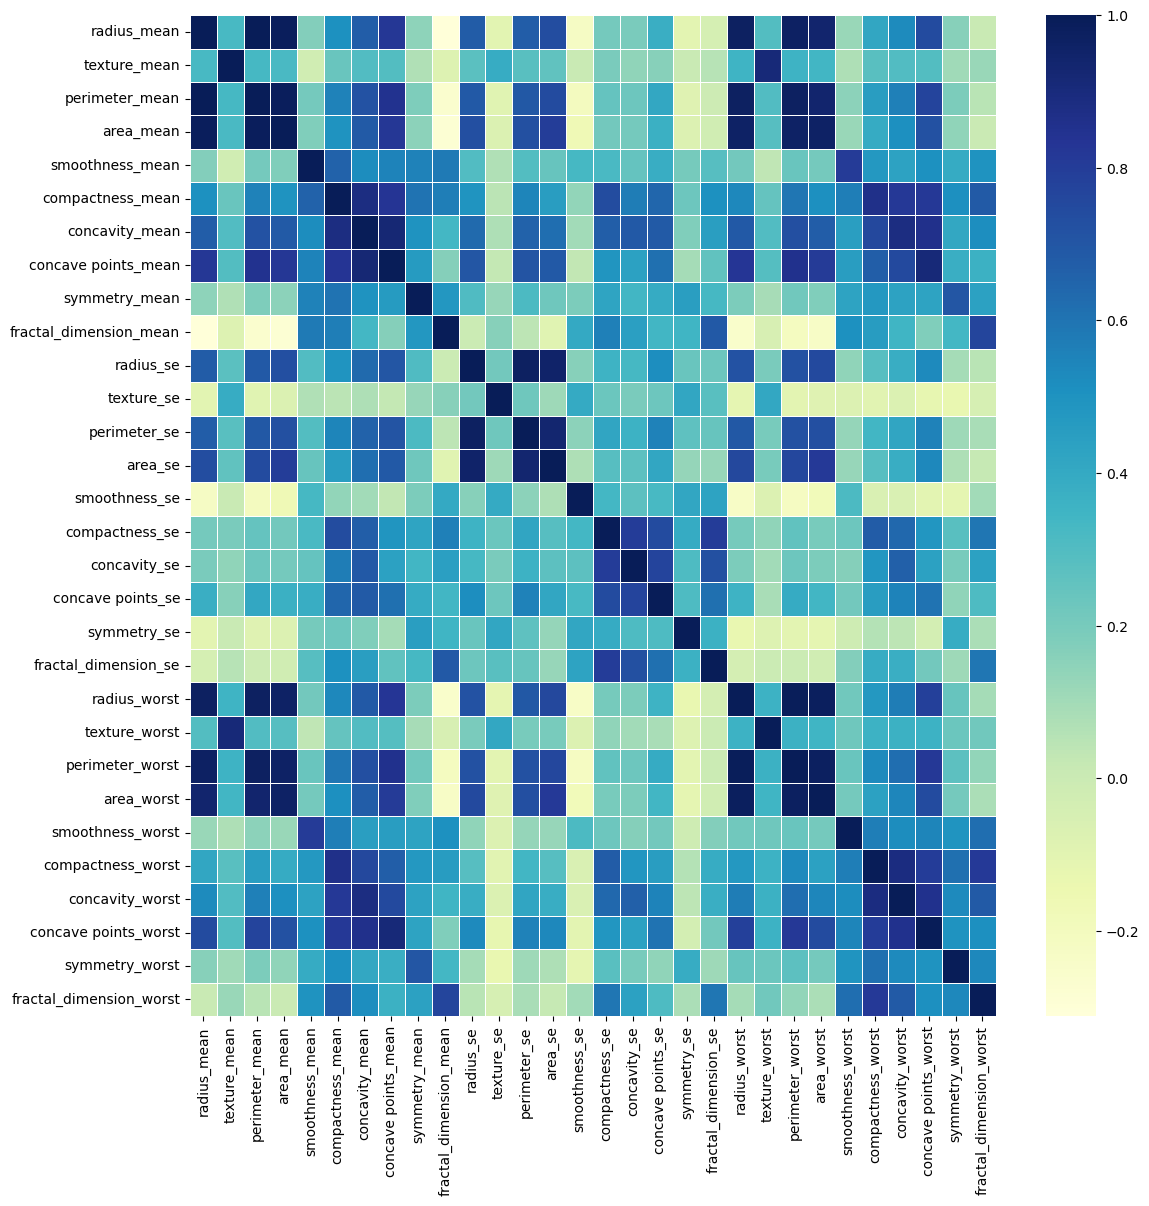

In [33]:

fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_cancer.corr(),cmap='YlGnBu',annot = False,linewidths=.5)

In [34]:
# sns.pairplot(df_cancer, hue="diagnosis")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DC162A7B00> (for post_execute):


KeyboardInterrupt: 

In [36]:
df_cancer.iloc[:,0:11]

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

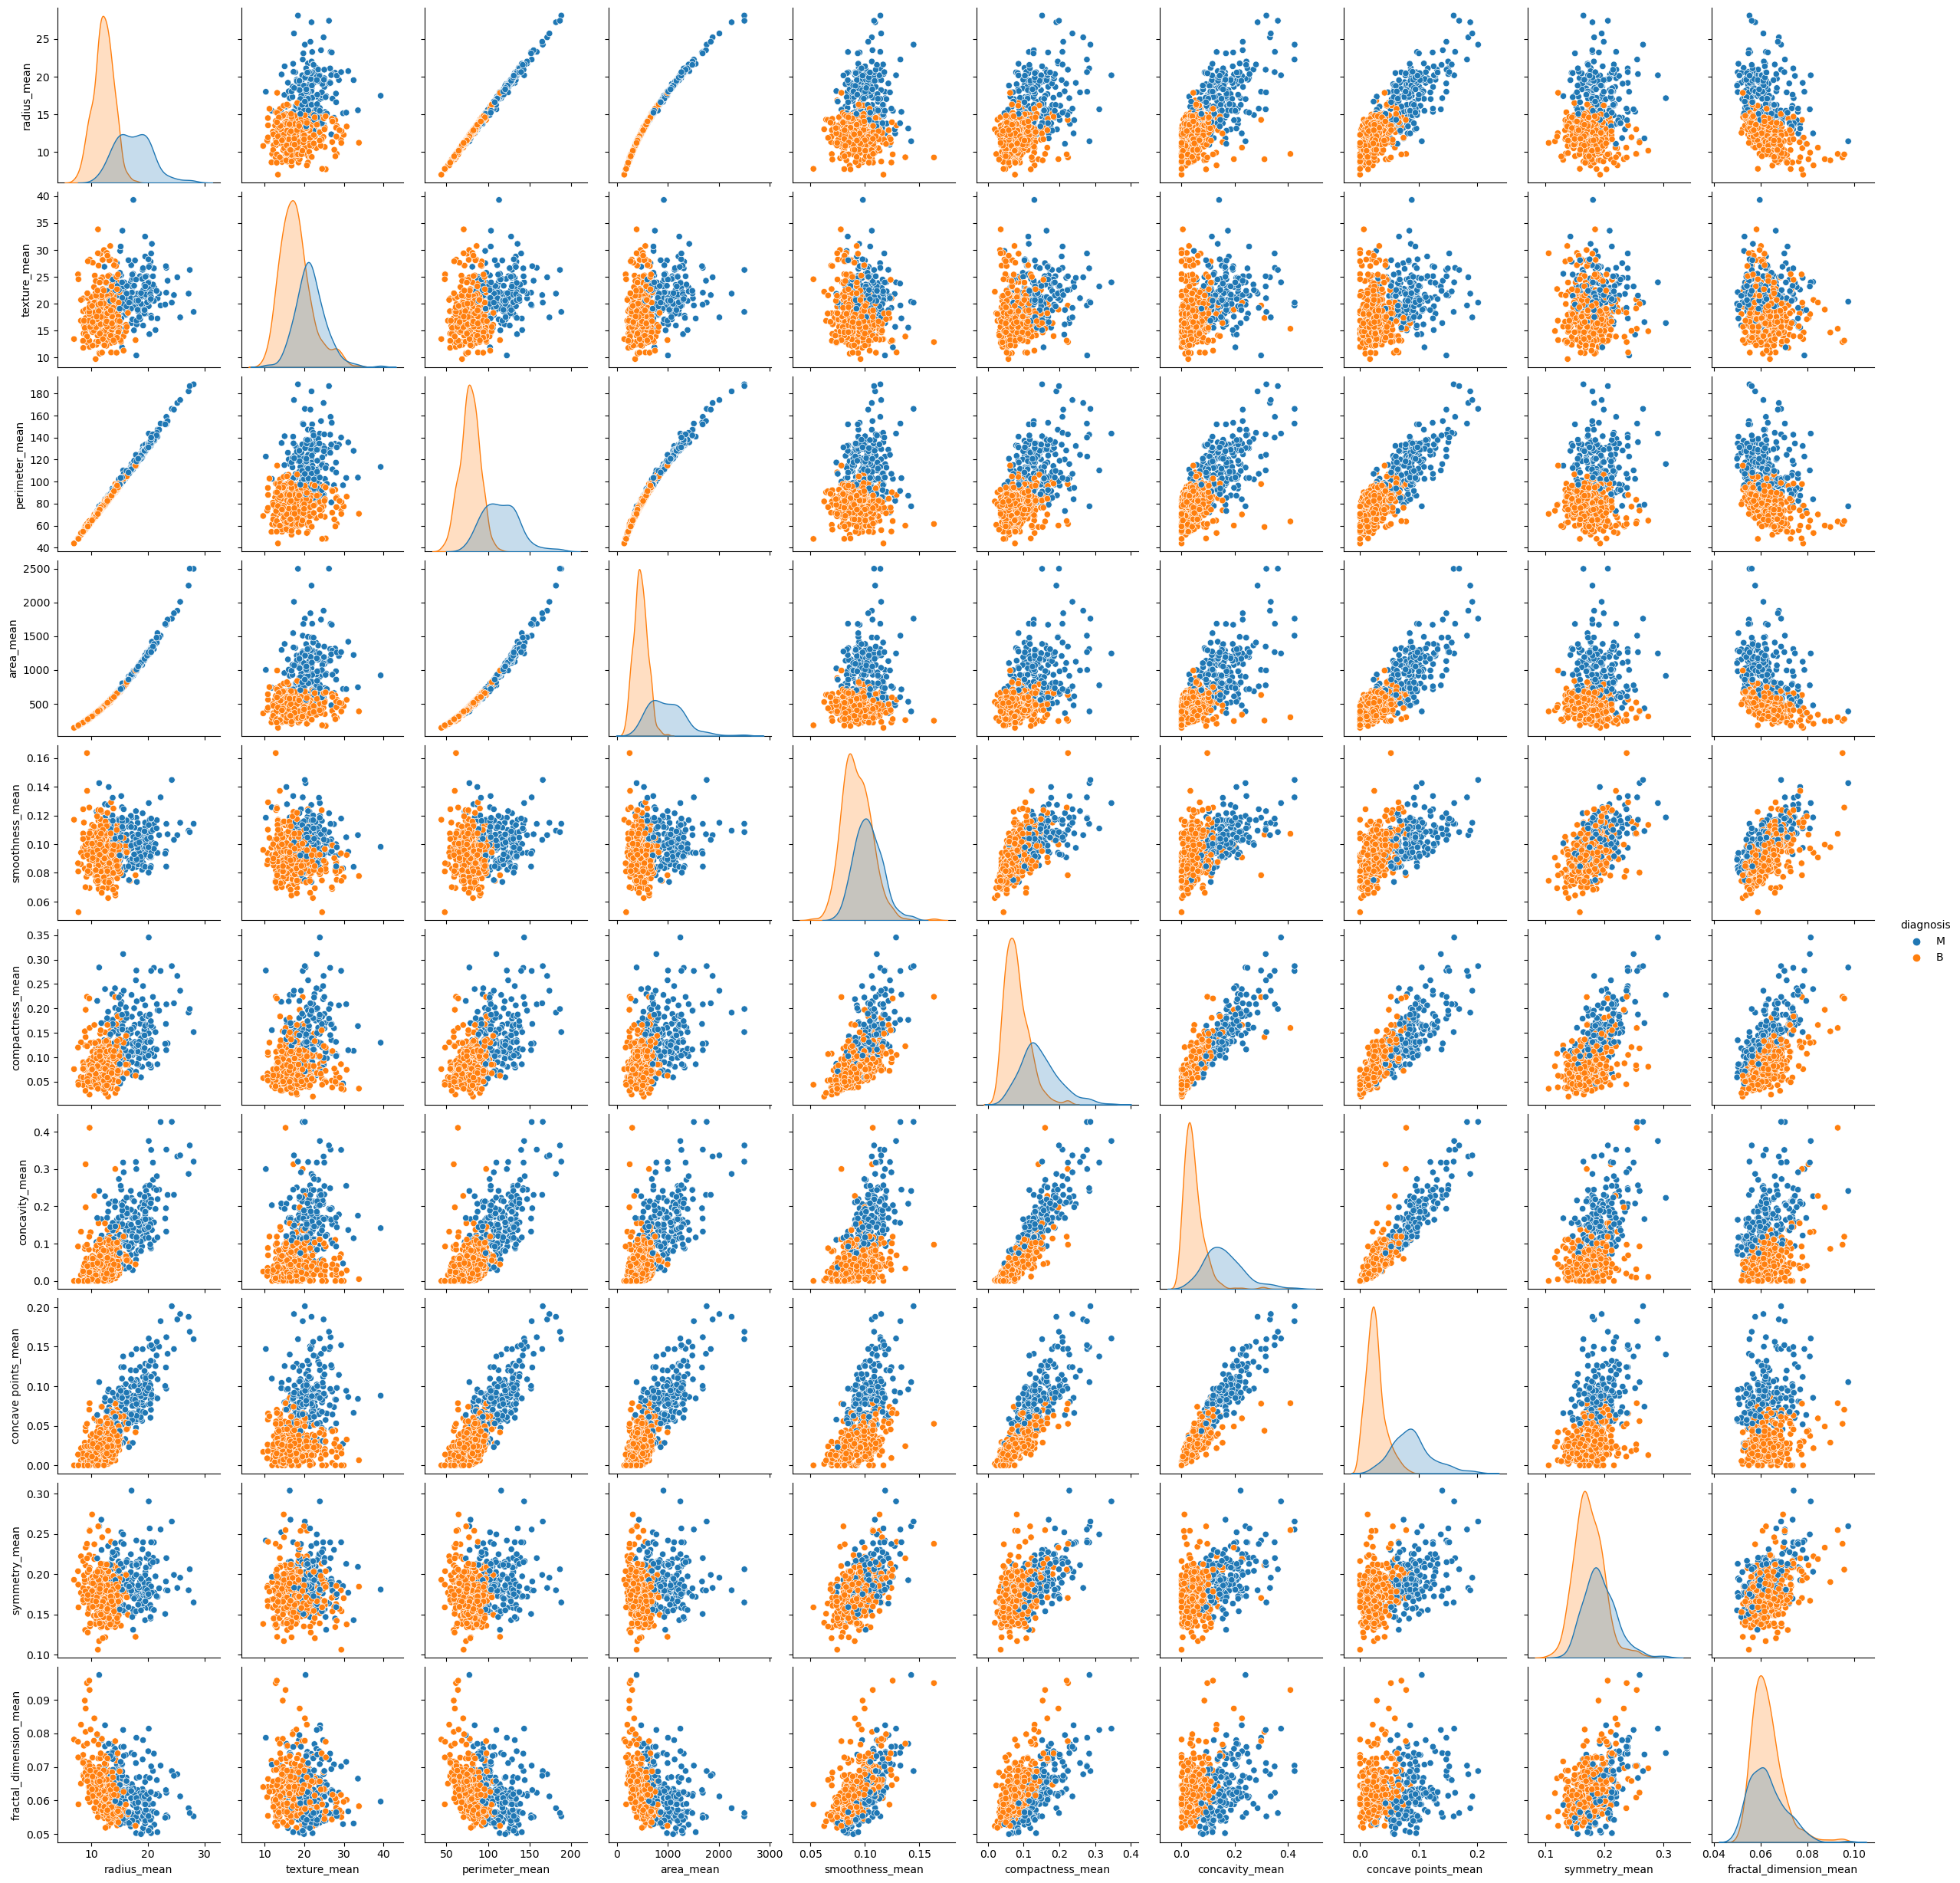

In [37]:
sns.pairplot(df_cancer.iloc[:,0:11], hue="diagnosis")

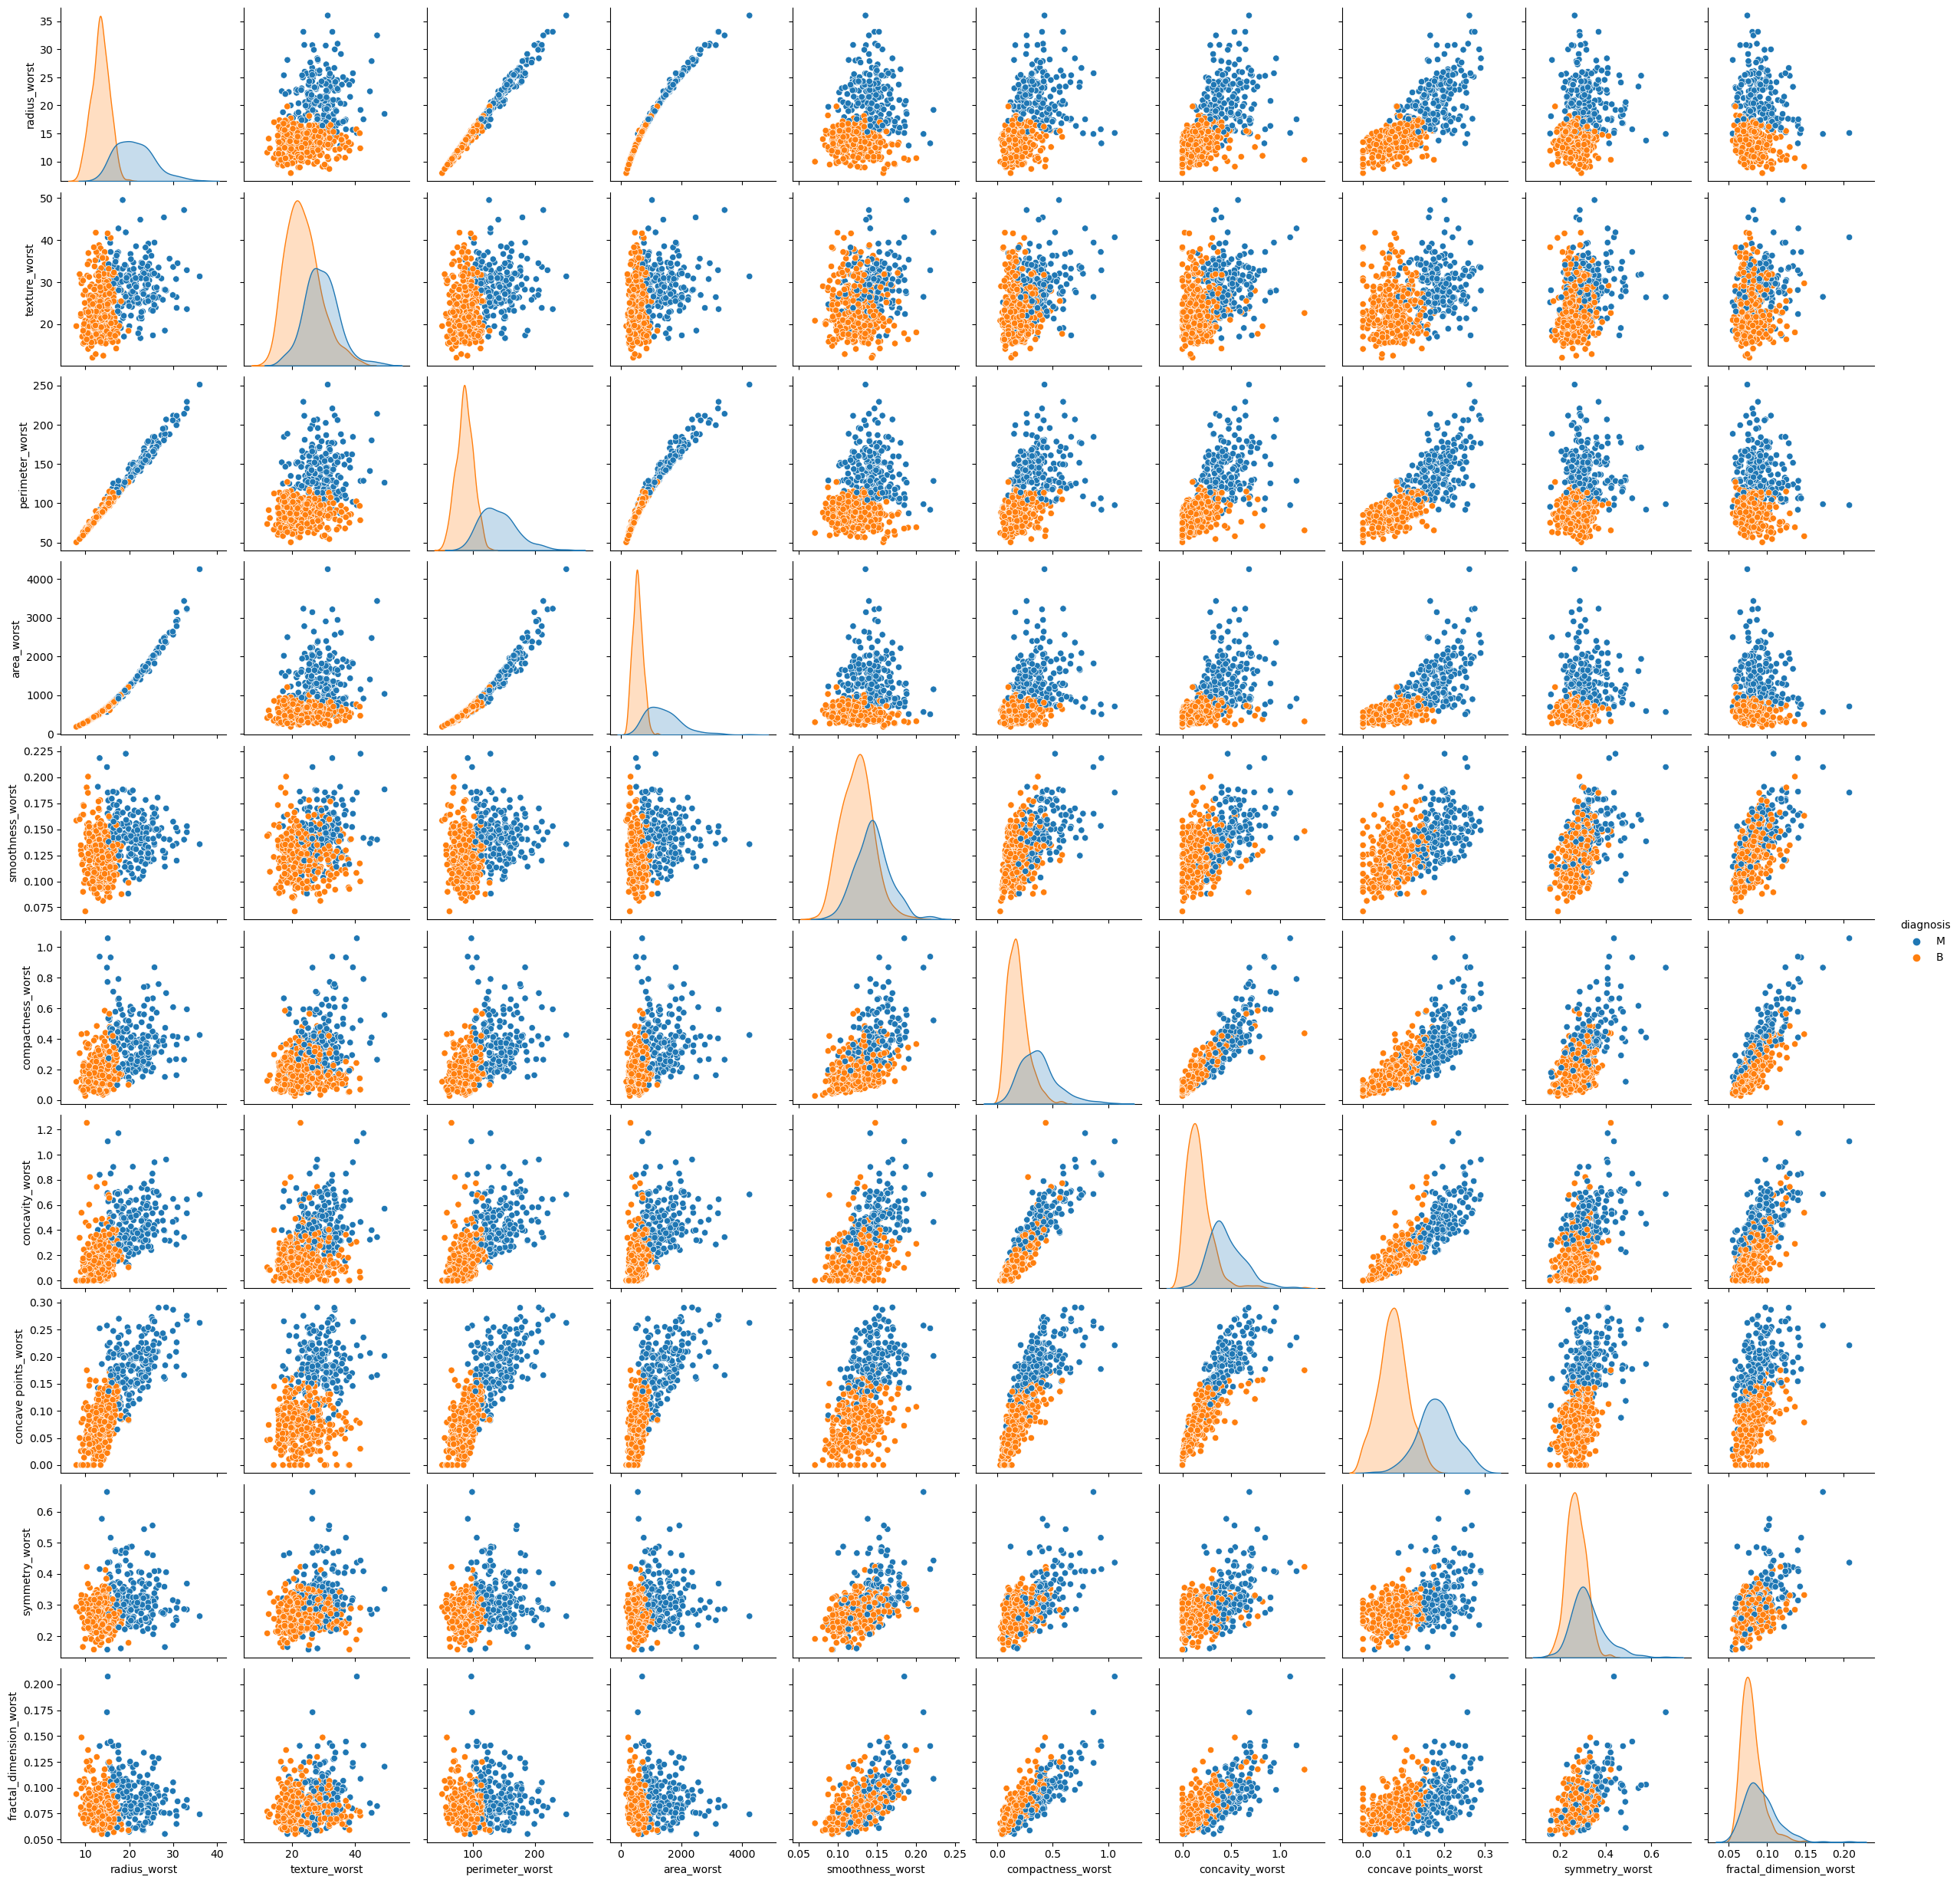

In [43]:
sns.pairplot(df_cancer.iloc[:,[0,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1]], hue="diagnosis")

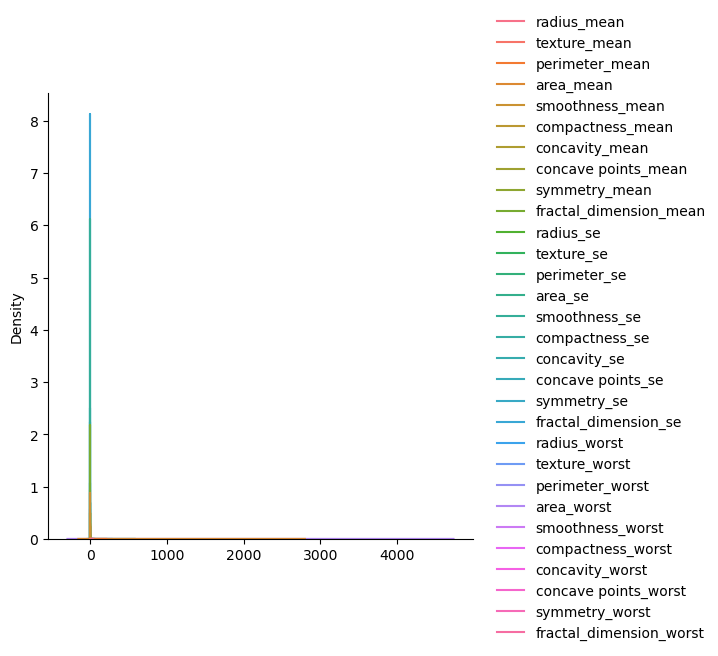

In [45]:
sns.displot(df_cancer,kind='kde',rug = False)

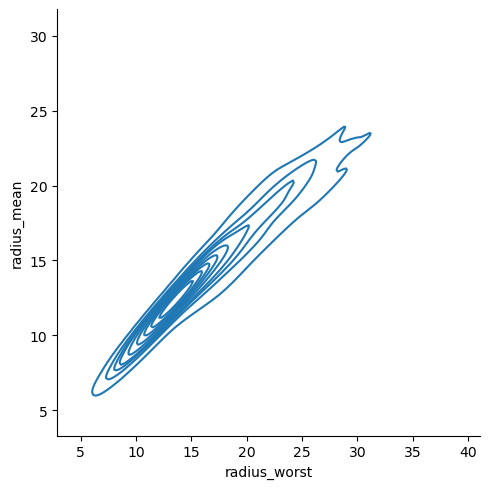

In [47]:
sns.displot(df_cancer,x='radius_worst',y='radius_mean',kind='kde',rug = False)

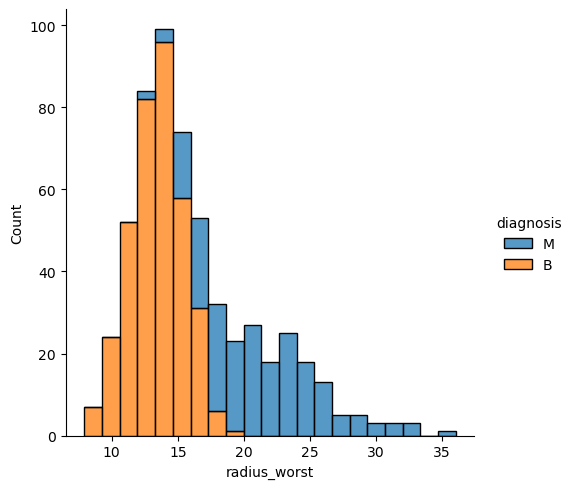

In [48]:
sns.displot(df_cancer, x="radius_worst", hue="diagnosis", multiple="stack")


C:\Users\vipul\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vipul\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\vipul\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


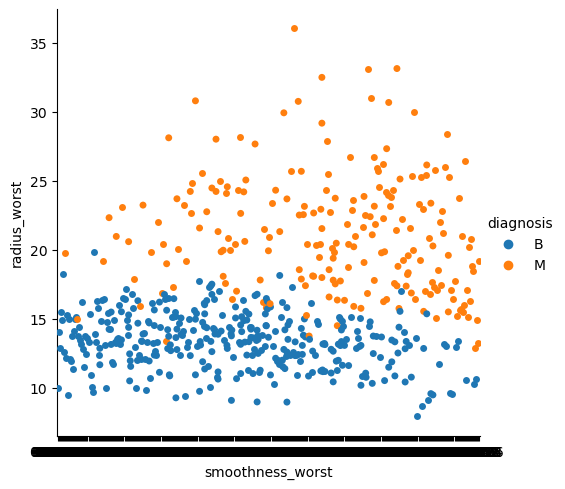

In [53]:
sns.catplot(data=df_cancer, x="smoothness_worst", y="radius_worst", hue="diagnosis", kind="swarm")


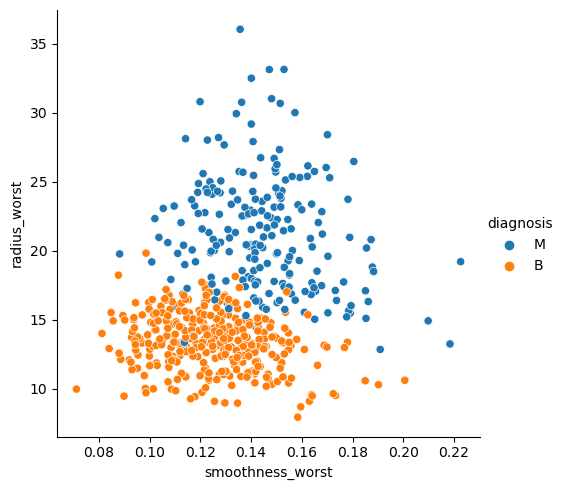

In [55]:
sns.relplot(data=df_cancer, x="smoothness_worst", y="radius_worst", hue="diagnosis")
